In [5]:
# importing some packages for EDA and modelling
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_percentage_error - can't use this as our version of sklearn isn't new enough?
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
import geopandas as gpd
#import geoplot as gplt - get errors when I try this, due to python version 3.6 - is it safe to upgrade to 3.7 or will that break my spark?

Let's find out what AirBnB data shows about my city of birth, Edinburgh!
The first stage is to import the data, eyeball it and think about what questions I might want to use it to answer.

In [3]:
## First of all, let's import some data, using pandas read csv
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

## these files are the summary files - where there were two files with the same name, I added "1" suffix to the summary versions
df_listings1 = pd.read_csv('listings1.csv')
df_neighbourhoods = pd.read_csv('neighbourhoods1.csv')
df_reviews1 = pd.read_csv('reviews1.csv')

## these files are the detailed files, I unzipped them first in Linux command line (see README)
df_cal = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')
df_reviews = pd.read_csv('reviews.csv')

In [2]:
df_listings1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,100,3,345,2020-08-28,5.35,1,151
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,219,2019-09-08,1.95,1,25
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,55,4,57,2018-08-27,0.98,2,298
3,44009,"Very Spacious, Well Lit, Double Room, Very Cen...",192586,Puneet,NaN,Marchmont West,55.93800,-3.19468,Private room,45,2,38,2013-07-22,0.29,1,87
4,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,200,2019-09-12,1.68,2,75


In [3]:
df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Abbeyhill
1,NaN,Baberton and Juniper Green
2,NaN,Balerno and Bonnington Village
3,NaN,Balgreen and Roseburn
4,NaN,"Barnton, Cammo and Cramond South"


In [4]:
df_neighbourhoods.describe(include='all') # doesn't look like this adds any value as all of neighbourhood_group is missing values

,neighbourhood_group,neighbourhood
count,0.0,111
unique,NaN,111
top,NaN,"Barnton, Cammo and Cramond South"
freq,NaN,1
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN


In [4]:
df_reviews1.head()

,listing_id,date
0,15420,2011-01-18
1,15420,2011-01-31
2,15420,2011-04-19
3,15420,2011-04-23
4,15420,2011-05-15


In [5]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2852317,2021-07-10,f,$40.00,$40.00,2,1125
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180


In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15420,https://www.airbnb.com/rooms/15420,20210710030835,2021-07-10,Georgian Boutique Apt City Centre,"Stunning, impeccably refurbished spacious grou...","The neighbourhood is in the historic New Town,...",https://a0.muscache.com/pictures/cf69631f-4194...,60423,https://www.airbnb.com/users/show/60423,...,4.98,4.98,4.90,NaN,f,1,1,0,0,5.35
1,24288,https://www.airbnb.com/rooms/24288,20210710030835,2021-07-10,"Cool central Loft, sleeps 4, 2 double bed+en-s...",Upper level of duplex. Boho rustic-chic former...,It's all in the mix: Culture-museums and galle...,https://a0.muscache.com/pictures/3460007/88731...,46498,https://www.airbnb.com/users/show/46498,...,4.89,4.85,4.60,NaN,t,1,1,0,0,1.95
2,38628,https://www.airbnb.com/rooms/38628,20210710030835,2021-07-10,Edinburgh Holiday Let,Brunstane - Daiches Braes (close to Portobello...,Quiet and easy access to outside.,https://a0.muscache.com/pictures/d9885120-178e...,165635,https://www.airbnb.com/users/show/165635,...,4.87,4.84,4.84,NaN,t,2,2,0,0,0.98
3,44009,https://www.airbnb.com/rooms/44009,20210710030835,2021-07-10,"Very Spacious, Well Lit, Double Room, Very Cen...","Imagine living in a beautiful, well lit, very ...",The flat is very central. It is 2mins from the...,https://a0.muscache.com/pictures/35cda67b-f2a0...,192586,https://www.airbnb.com/users/show/192586,...,4.73,4.67,4.63,NaN,f,1,0,1,0,0.29
4,44552,https://www.airbnb.com/rooms/44552,20210710030835,2021-07-10,Double room - spacious Leith flat,Pleasant double room in 2 bedroom ground floor...,NaN,https://a0.muscache.com/pictures/454814/0e351a...,195950,https://www.airbnb.com/users/show/195950,...,4.84,4.58,4.72,NaN,f,2,0,2,0,1.68


In [7]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,171793,2011-01-18,186358,Nels,My wife and I stayed at this beautiful apartme...
1,15420,176350,2011-01-31,95218,Gareth,Charlotte couldn't have been a more thoughtful...
2,15420,232149,2011-04-19,429751,Guido,I went to Edinburgh for the second time on Apr...
3,15420,236073,2011-04-23,420830,Mariah,This flat was incredible. As other guests have...
4,15420,263713,2011-05-15,203827,Linda,Fantastic host and the apartment was perfect. ...


Here are some potentially interesting questions I could answer using this data:<br>
How many properties are available to rent?<br>
How many hosts are letting them?<br>
Number of properties per host - are people just letting their flat while they are away(casual letting, pocket money)? or do some people own a load of properties to let out and make income from (small business, income stream)?<br>
What parts of the city have the most listings? (can I map this to show visually?)<br>
What's the most popular room type?<br>
What's the most popular min/max stays (advertised)?<br>
What price range are the listings - and how does this relate to neighbourhood/room type?<br>
Is there seasonality in Edinburgh bookings? (my gut says August and Hogmanay will be most popular times...) - does this link to pricing? (again, I'd expect peak times to be most expensive)<br>
What words are most commonly used to describe lettings (by hosts)?<br>
Do reviewers agree/what words do they use? - sentiment analysis? - should Air BnB have this as a tool for hosts/visitors? select properties based on certain words/themes e.g. trendy vs historical etc.<br>
If I had a property in Edinburgh, how would I price it? Can I build a predictive model that predicts price based on property listing details? -- should AirBnB have this as a tool for hosts?<br>
What is the range of review scores, and what influences score? Can I build a predictive model that predicts score based on property listing details? -- should AirBnB have a tool for hosts to help them improve their scores?<br>


In [14]:
df_listings1.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,6.634000e+03,6634,6.634000e+03,6554,0.0,6634,6634.000000,6634.000000,6634,6634.000000,6634.000000,6634.000000,5566,5566.000000,6634.000000,6634.000000
unique,NaN,6555,NaN,1773,NaN,111,NaN,NaN,4,NaN,NaN,NaN,1115,NaN,NaN,NaN
top,NaN,Mono Suites - One Bedroom Suite,NaN,James,NaN,"Old Town, Princes Street and Leith Street",NaN,NaN,Entire home/apt,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN
freq,NaN,7,NaN,210,NaN,765,NaN,NaN,4375,NaN,NaN,NaN,101,NaN,NaN,NaN
mean,2.641679e+07,NaN,1.156050e+08,NaN,NaN,NaN,55.950456,-3.198222,NaN,144.704402,4.853482,56.100844,NaN,1.701010,12.283087,155.290473
std,1.465081e+07,NaN,1.169969e+08,NaN,NaN,NaN,0.015453,0.037759,NaN,523.968883,33.740421,89.226018,NaN,2.222943,33.322392,131.474545
min,1.542000e+04,NaN,3.629800e+04,NaN,NaN,NaN,55.858160,-3.418760,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,1.434876e+07,NaN,2.092327e+07,NaN,NaN,NaN,55.942475,-3.211848,NaN,55.000000,1.000000,2.000000,NaN,0.370000,1.000000,29.000000
50%,2.635944e+07,NaN,6.828647e+07,NaN,NaN,NaN,55.951005,-3.193375,NaN,85.000000,2.000000,19.000000,NaN,1.090000,2.000000,127.000000
75%,3.771678e+07,NaN,1.897102e+08,NaN,NaN,NaN,55.959930,-3.178385,NaN,133.000000,3.000000,74.000000,NaN,2.410000,5.000000,293.000000


In [22]:
df_listings1['id'].nunique() # how many unique listings are there? 6,634 - so data set is one row per listing

6634

In [23]:
df_listings1['host_id'].nunique() # belonging to 4,036 unique hosts

4036

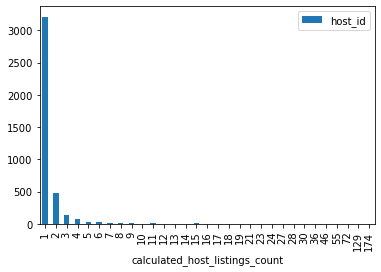

In [28]:
# let's chart how many listings per host, I expect most hosts only have one...
listings_per_host = df_listings1[['host_id','calculated_host_listings_count']].groupby('calculated_host_listings_count').nunique()
listings_per_host.reset_index(drop=False, inplace=True)
listings_per_host.plot(x='calculated_host_listings_count', y='host_id', kind='bar')
plt.show()
# about three quarters of hosts only have one listing but there are a chunk with 2 and some outliers with over 100!
# come back to this and make it prettier

In [35]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).head(10) # top 10 neighbourhoods are central, near tourist attractions (makes sense)

,id
neighbourhood,
"Old Town, Princes Street and Leith Street",765
Deans Village,392
Tollcross,334
Hillside and Calton Hill,247
Dalry and Fountainbridge,242
Meadows and Southside,228
New Town West,225
"Canongate, Southside and Dumbiedykes",224
New Town East and Gayfield,174


In [36]:
df_listings1[['neighbourhood','id']].groupby('neighbourhood').count().sort_values(by='id', ascending=False).tail(10) # bottom 10 also make sense
# some are out of town, areas I would describe as satellite villages rather than part of Edinburgh proper 
# some are less attractive neighbourhoods - fine to live in but not what a tourist would imagine when they think of Edinburgh

,id
neighbourhood,
Clovenstone and Wester Hailes,8
Colinton Mains and Firrhill,8
Liberton East,8
East Craigs North,8
Hyvots and Gilmerton,7
Queensferry West,6
Currie East,6
Carrick Knowe,6
"Barnton, Cammo and Cramond South",4


In [7]:
# come back to mapping this later?
data = gpd.read_file("neighbourhoods.geojson")
data.crs
# have installed geoplot but it doesn't seem to work, searching error message suggests its an error with my environment? not clear what...

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
data

,neighbourhood,neighbourhood_group,geometry
0,Balerno and Bonnington Village,None,"MULTIPOLYGON (((-3.35805 55.91088, -3.35950 55..."
1,Currie West,None,"MULTIPOLYGON (((-3.30557 55.92039, -3.30418 55..."
2,Currie East,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30870 55..."
3,Baberton and Juniper Green,None,"MULTIPOLYGON (((-3.28635 55.91564, -3.28617 55..."
4,Bonaly and The Pentlands,None,"MULTIPOLYGON (((-3.30808 55.89430, -3.30834 55..."
...,...,...,...
106,South Gyle,None,"MULTIPOLYGON (((-3.30084 55.94246, -3.30081 55..."
107,"Ratho, Ingliston and Gogar",None,"MULTIPOLYGON (((-3.34287 55.96432, -3.34150 55..."
108,Queensferry West,None,"MULTIPOLYGON (((-3.41600 55.99385, -3.41582 55..."
109,"Dalmeny, Kirkliston and Newbridge",None,"MULTIPOLYGON (((-3.29012 55.99545, -3.28998 55..."


In [45]:
df_listings1[['room_type']].value_counts(normalize=True) # c.two-thirds are the whole home/apt - wonder what "hotel room" means, do hotels advertise on AirBnB?
# Shared room is a low proportion, can't imagine they are popular, possibly very cheap though!

room_type      
Entire home/apt    0.659481
Private room       0.321224
Hotel room         0.015526
Shared room        0.003768
dtype: float64

In [47]:
df_listings1.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                           80
neighbourhood_group               6634
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       1068
reviews_per_month                 1068
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [49]:
df_listings1[['room_type','price']].groupby('room_type').mean() # yep, shared rooms are significantly cheaper
# Hotel Room most expensive so I guess these really are proper hotel rooms
# price differential between Entire Home and Private Room isn't as big as I might have expected? Maybe single rooms are more likely to be listed during the Festival when prices are likely to be higher?
# I can imagine aspiring comedians renting them during the Fringe, somewhere to stay while they wait to be "discovered"!

,price
room_type,
Entire home/apt,157.783314
Hotel room,259.116505
Private room,113.627874
Shared room,33.480000


In [51]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).head(10)
# more expensive areas are where you can rent a whole, big house as opposed to city centre flat?
# probably need to compare to room type too to make most learnings
# plus some areas possibly have outliers in price skewing the mean or a low number of properties could also skew

,price
neighbourhood,
Boswall and Pilton,671.896552
The Calders,474.500000
Broughton South,404.042683
South Gyle,351.400000
Western Harbour and Leith Docks,339.871795
New Town West,248.960000
Deans Village,220.778061
South Leith,194.373913
"Dalmeny, Kirkliston and Newbridge",184.047619


In [52]:
df_listings1[['neighbourhood','price']].groupby('neighbourhood').mean().sort_values(by='price', ascending=False).tail(10)

,price
neighbourhood,
Oxgangs,49.909091
Granton South and Wardieburn,49.750000
"Gracemount, Southhouse and Burdiehouse",48.642857
Muirhouse,48.066667
Mortonhall and Anwickhill,45.777778
"Jewel, Brunstane and Newcraighall",45.375000
Comiston and Swanston,44.000000
Niddrie,42.222222
Hyvots and Gilmerton,34.142857


In [54]:
#170756
df_cal[df_cal['listing_id']==170756] # are there 365 rows per listing id

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1,170756,2021-07-10,f,$53.00,$53.00,2,180
2,170756,2021-07-11,f,$54.00,$54.00,1,180
3,170756,2021-07-12,f,$53.00,$53.00,1,180
4,170756,2021-07-13,f,$53.00,$53.00,1,180
5,170756,2021-07-14,f,$53.00,$53.00,1,180
...,...,...,...,...,...,...,...
361,170756,2022-07-05,f,$50.00,$50.00,1,180
362,170756,2022-07-06,f,$50.00,$50.00,1,180
363,170756,2022-07-07,f,$50.00,$50.00,1,180
364,170756,2022-07-08,f,$50.00,$50.00,2,180


In [62]:
df_cal.shape[0]/df_listings1.shape[0] # looks likely as number of rows in calendar table divided by number of listings = 365


365.0

In [69]:
df_cal[['available','listing_id']].groupby('available').count() # looks like available is set to t when property is available
# does available just mean, host has listed it for that date? or does it mean, listed and not booked yet? 
# I think based on data dictionary it is a combination of both - i.e. will be set to f either if host doesn't want to rent on that date or someone else has already booked it
# I was assuming the first, as it looks like every property appears 365 times but I wouldn't expect them all to be available all year round as surely some hosts only rent out when they are elsewhere?

,listing_id
available,
f,1390516
t,1030894


In [73]:
df_cal.dtypes # I want to use this table to look at the seasonality of pricing, but it looks like date and price are strings rather than the appropriate data types

listing_id         int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights     int64
maximum_nights     int64
dtype: object

In [6]:
df_cal['date_fmt'] = pd.to_datetime(df_cal['date'],errors='coerce')# add formatted date field
df_cal['price_fmt'] = pd.to_numeric(df_cal['price'].str.replace('$','').str.replace(',','')) # add formatted price field
df_cal['month'] = df_cal['date_fmt'].dt.month # add month to group by
#seasonality = df_cal[df_cal['available']=='t'].groupby('month_year').agg({'listing_id':'count','price_fmt':'mean'})# group and get volumes and avg price by month
seasonality = df_cal.groupby('month').agg({'listing_id':'count','price_fmt':'mean'})# group and get volumes and avg price by month
#dt.to_period('M').dt.to_timestamp()  - this sets to month start, but July is spread over two years, 2021 and 2022

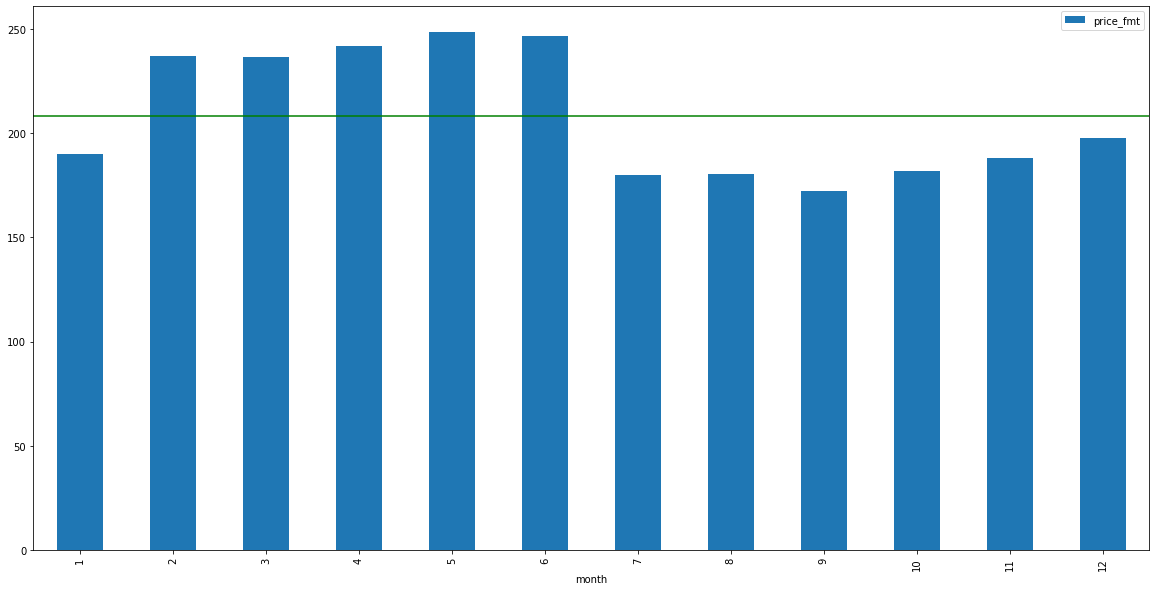

In [9]:
seasonality.plot(x='month', y='price_fmt', kind='bar',figsize=(20,10))
plt.axhline(y=seasonality['price_fmt'].mean(),color='green')# add a line to show the average
plt.show()

Pricing seasonality isn't following what I expected. As the festival is in August, I expected that month to have the highest demand and also highest pricing - however May is the peak.

In [47]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_fmt,price_fmt,month_year
0,2852317,2021-07-10,f,$40.00,$40.00,2,1125,2021-07-10,40.0,7
1,170756,2021-07-10,f,$53.00,$53.00,2,180,2021-07-10,53.0,7
2,170756,2021-07-11,f,$54.00,$54.00,1,180,2021-07-11,54.0,7
3,170756,2021-07-12,f,$53.00,$53.00,1,180,2021-07-12,53.0,7
4,170756,2021-07-13,f,$53.00,$53.00,1,180,2021-07-13,53.0,7


In [3]:
check = df_cal['price']==df_cal['adjusted_price']

In [6]:
check.sum()/df_cal.shape[0] # I wonder what adjusted price is? 98% of time it is the same as price, but not always...

0.9752957987288398

In [11]:
df_cal_merge = pd.merge(df_cal,df_listings1[['id','room_type']], left_on='listing_id', right_on='id', how='left')
df_cal_merge = df_cal_merge.drop('id', axis=1)

In [14]:
# cross tab of room type vs avg price by month
agg_cal1 = df_cal_merge.groupby(['month', 'room_type'])['price_fmt'].mean().unstack().fillna(0)
agg_cal1

room_type,Entire home/apt,Hotel room,Private room,Shared room
month,,,,
1,190.267106,240.567178,188.395059,63.985806
2,260.211763,251.137656,190.858770,34.057143
3,260.261751,245.329471,190.503144,33.585806
4,266.437783,339.654369,189.252591,33.640000
5,272.920774,409.364861,192.705102,33.498065
6,276.786819,411.282848,179.227118,33.714667
7,203.129149,306.384278,128.477330,42.490323
8,206.062001,291.262136,124.547327,49.674839
9,174.099268,262.911974,165.032098,34.474667


In [18]:
agg_cal1.to_csv('crosstab.csv', index=True)

In [19]:
df_cal_merge.groupby(['room_type'])['price_fmt'].mean() # compare to mean by room_type

room_type
Entire home/apt    223.018474
Hotel room         295.413007
Private room       175.273029
Shared room         41.048877
Name: price_fmt, dtype: float64

Looks like price seasonality varies by room type?
Shared room is how I expected, peaks in December/January for Christmas/Hogmannay and a peak in August for festival. This room type also has the most extreme variances in price, with January and December 1.5 times the overall average.
February-June is peak price time for Entire home/apt.
Hotel peaks in May/June.
Private room is fairly consistently priced, with a dip in July/August (i.e. festival time)

In [27]:
df_listings1[df_listings1['id']==170756] 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
18,170756,Guest-room in Central Penthouse,278168,Maureen,NaN,Tollcross,55.94385,-3.20925,Private room,53,2,348,2020-02-20,3.52,1,0


In [31]:
df_cal[df_cal['listing_id']==170756].mean()

/home/mcphaij/miniconda3/envs/carafe-env-hgl/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


listing_id        170756.000000
minimum_nights         1.287671
maximum_nights       180.000000
price_fmt             51.416438
month_year             6.526027
dtype: float64

In [32]:
df_cal[df_cal['listing_id']==170756]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,date_fmt,price_fmt,month_year
1,170756,2021-07-10,f,$53.00,$53.00,2,180,2021-07-10,53.0,7
2,170756,2021-07-11,f,$54.00,$54.00,1,180,2021-07-11,54.0,7
3,170756,2021-07-12,f,$53.00,$53.00,1,180,2021-07-12,53.0,7
4,170756,2021-07-13,f,$53.00,$53.00,1,180,2021-07-13,53.0,7
5,170756,2021-07-14,f,$53.00,$53.00,1,180,2021-07-14,53.0,7
...,...,...,...,...,...,...,...,...,...,...
361,170756,2022-07-05,f,$50.00,$50.00,1,180,2022-07-05,50.0,7
362,170756,2022-07-06,f,$50.00,$50.00,1,180,2022-07-06,50.0,7
363,170756,2022-07-07,f,$50.00,$50.00,1,180,2022-07-07,50.0,7
364,170756,2022-07-08,f,$50.00,$50.00,2,180,2022-07-08,50.0,7


In [ ]:
#price in listings table is just the first one for that listing? 
# there are properties with no availability in next year? 

In [33]:
df_listings1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,100,3,345,2020-08-28,5.35,1,151
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,219,2019-09-08,1.95,1,25
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,55,4,57,2018-08-27,0.98,2,298
3,44009,"Very Spacious, Well Lit, Double Room, Very Cen...",192586,Puneet,NaN,Marchmont West,55.93800,-3.19468,Private room,45,2,38,2013-07-22,0.29,1,87
4,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,200,2019-09-12,1.68,2,75


In [ ]:
## build a model to try and predict price using neighbourhood, room type, reviews per month, listings count and availability
## there's a data dictionary on the AirBnB website but I can't access it using VCS, need to do it from a personal device

In [2]:

# remove ids, empty column, and things we don't know before we list
df_model_data = df_listings1.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['neighbourhood','room_type'], drop_first=False)
y = df_model_data.pop('price') # pop out price to be the target variable
X = df_model_data # the rest of the columns are the predicitive features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability
dtree = DecisionTreeClassifier() #instantiate decision tree
dtree.fit(X_train,y_train)# fit it on the training data
pred_1 = dtree.predict(X_test) # predict on test data to see how well it works on unseen data

In [30]:
pred_1

array([ 83,  70, 527, ...,  61, 175, 181])

In [3]:
mse = mean_squared_error(y_test,pred_1)
mae = mean_absolute_error(y_test, pred_1)
medae = median_absolute_error(y_test, pred_1)
#mape = mean_absolute_percentage_error(y_test,pred_1)

In [4]:
mse

295944.3571069814

In [5]:
mae

94.47061778001004

In [6]:
medae

30.0

In [ ]:
# there's a big difference between mean absolute error and median absolute error - skewed by outliers?

In [10]:
def mape(a, b): 
    mask = a != 0
    return np.mean(np.abs((a - b) / a)[mask]) * 100

In [11]:
mape(y_test, pred_1)

76.08118503727104

In [12]:
importances = pd.Series(dtree.feature_importances_, name='importance')
cols = pd.Series(X_test.columns, name='feature')
df_importance = pd.merge(cols, importances, right_index = True,left_index = True)
df_importance.sort_values(by=['importance'], ascending=False).head(20)

,feature,importance
0,latitude,0.227320
1,longitude,0.222638
4,availability_365,0.197434
2,minimum_nights,0.074394
3,calculated_host_listings_count,0.071969
87,"neighbourhood_Old Town, Princes Street and Lei...",0.014795
110,neighbourhood_Tollcross,0.010816
41,neighbourhood_Deans Village,0.010384
40,neighbourhood_Dalry and Fountainbridge,0.009517
71,neighbourhood_Meadows and Southside,0.006703


In [18]:
actuals = pd.Series(y_test, name = 'actual')
preds = pd.Series(pred_1, name = 'prediction')
df_test = pd.merge(actuals, preds, right_index=True, left_index=True)

In [20]:
df_test.to_csv('test.csv', index=False)

In [81]:
X_test.iloc[2]

latitude                                             55.952545
longitude                                            -3.199075
minimum_nights                                        2.000000
calculated_host_listings_count                        1.000000
availability_365                                    336.000000
                                                       ...    
neighbourhood_Willowbrae and Duddingston Village      0.000000
room_type_Entire home/apt                             1.000000
room_type_Hotel room                                  0.000000
room_type_Private room                                0.000000
room_type_Shared room                                 0.000000
Name: 4701, Length: 120, dtype: float64

In [ ]:
# we don't know how many people each listing can accommodate, probably the strongest indicator of price?
# also some ridiculous outliers in the listings, e.g. entire home for £17,626 - that can't be for one night?!

In [83]:
df_listings1.sort_values(by=['price'], ascending=False).head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2992,24058119,Beautiful Edinburgh Cottage with Parking,11362736,Sonia,NaN,Boswall and Pilton,55.97903,-3.21763,Entire home/apt,17626,1,18,2019-01-04,0.49,15,348
2702,21837493,Large Penthouse With Amazing City Views,159226863,Shauna,NaN,Western Harbour and Leith Docks,55.98496,-3.18876,Entire home/apt,17626,1,0,NaN,NaN,1,365
6234,49492800,"9/2 Albany Street, EDINBURGH",23701935,Sykes Holiday Cottages,NaN,"Old Town, Princes Street and Leith Street",55.95633,-3.19158,Entire home/apt,17626,2,0,NaN,NaN,1,365
3660,28508638,"Spacious apartment, Cumberland Street",11362736,Sonia,NaN,New Town West,55.95787,-3.20314,Entire home/apt,17626,1,15,2019-08-24,0.60,15,363
5223,40104817,Stunning three bedroom apartment,22185623,Dougie,NaN,Deans Village,55.95181,-3.20535,Entire home/apt,14515,1,0,NaN,NaN,1,247
4819,36903267,Ticks all the boxes,50461830,Donald,NaN,Tollcross,55.94217,-3.20576,Private room,6000,2,5,2019-08-24,0.21,1,190
5761,45113209,PROMO ✷✺✻ Nice Room Near Hopetoun Crescent Gar...,129230780,STK Homes,NaN,Broughton South,55.96264,-3.18235,Private room,3200,2,0,NaN,NaN,46,308
5933,46763218,PROMO ☀Comfortable Room Near Hopetoun Crescent...,258154594,Atanas,NaN,Broughton South,55.96109,-3.18289,Private room,3200,2,0,NaN,NaN,8,0
5739,45111198,PROMO ✺✭ Attractive Room Near Hopetoun Crescen...,129230780,STK Homes,NaN,Hillside and Calton Hill,55.96049,-3.18134,Private room,3200,2,0,NaN,NaN,46,308
5738,45111153,PROMO ✻⋆≛ Classy Room Near Hopetoun Crescent G...,129230780,STK Homes,NaN,Broughton South,55.96270,-3.18232,Private room,3200,2,0,NaN,NaN,46,308


In [84]:
df_listings[df_listings['id']==24058119]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2992,24058119,https://www.airbnb.com/rooms/24058119,20210710030835,2021-07-10,Beautiful Edinburgh Cottage with Parking,Beautiful cottage in the city of Edinburgh wit...,NaN,https://a0.muscache.com/pictures/5afc6b7b-673d...,11362736,https://www.airbnb.com/users/show/11362736,...,5.0,4.78,4.89,NaN,t,15,15,0,0,0.49


In [ ]:
#try removing outliers!

In [85]:
df_cal[df_cal['listing_id']==24058119]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
1069451,24058119,2021-07-10,t,"$17,626.00","$17,626.00",1,30
1069452,24058119,2021-07-11,t,"$17,626.00","$17,626.00",1,30
1069453,24058119,2021-07-12,t,"$17,626.00","$17,626.00",1,30
1069454,24058119,2021-07-13,t,"$17,626.00","$17,626.00",1,30
1069455,24058119,2021-07-14,t,"$17,626.00","$17,626.00",1,30
...,...,...,...,...,...,...,...
1070767,24058119,2022-07-05,t,"$17,626.00","$17,626.00",1,30
1070768,24058119,2022-07-06,t,"$17,626.00","$17,626.00",1,30
1070769,24058119,2022-07-07,t,"$17,626.00","$17,626.00",1,30
1070770,24058119,2022-07-08,t,"$17,626.00","$17,626.00",1,30


In [ ]:
# this is a two bed cottage, can't possibly be £17k per night, could feasibly be for a whole month? still seems pricey - £587 per night?

In [21]:
df_listings1['price'].describe()

count     6634.000000
mean       144.704402
std        523.968883
min          0.000000
25%         55.000000
50%         85.000000
75%        133.000000
max      17626.000000
Name: price, dtype: float64

In [24]:
z = np.abs(stats.zscore(df_listings1['price']))

In [25]:
z

array([0.08532524, 0.09486851, 0.17121468, ..., 0.04446324, 0.0910512 ,
       0.11586371])

In [27]:
sum(z>=3)

36

In [28]:
sum(z<=-3)

0

In [57]:
df_listings1['price'][(z>=3)]

312      2270
660      1999
2172     2500
2702    17626
2992    17626
3388     2900
3399     2900
3424     2900
3660    17626
3708     3000
3813     3000
4318     1850
4819     6000
5223    14515
5736     3200
5737     3200
5738     3200
5739     3200
5743     3200
5744     3200
5745     3200
5746     3200
5747     3200
5755     3200
5761     3200
5793     2500
5821     1998
5933     3200
5935     3200
5936     3200
5937     3200
5938     3200
5939     3200
5950     3200
5951     3200
6234    17626
Name: price, dtype: int64

In [41]:
Q1 = df_listings1['price'].quantile(q=.25)
Q3 = df_listings1['price'].quantile(q=.75)
IQR = Q3 - Q1

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
#data_clean = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]


In [42]:
Q1

55.0

In [43]:
Q3

133.0

In [44]:
IQR

78.0

In [45]:
Q1-(1.5*IQR)

-62.0

In [46]:
Q3+(1.5*IQR)

250.0

In [48]:
sum(df_listings1['price']>250)

501

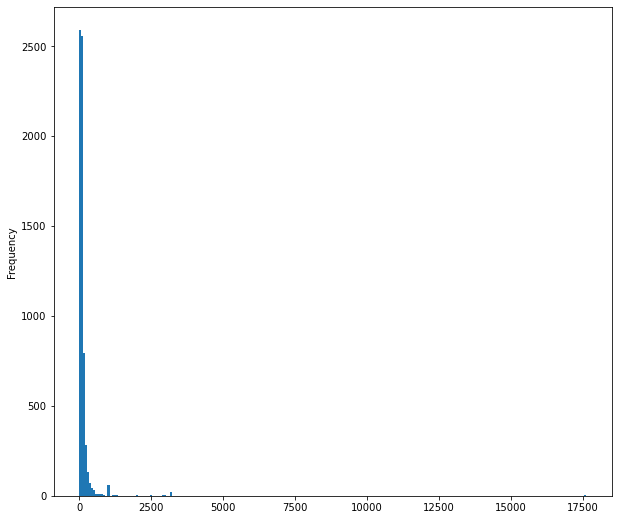

In [58]:
price = df_listings1['price']
price.plot(kind='hist', figsize=(10,9), bins=250)
plt.show()

In [55]:
sum(df_listings1['price']>250)/df_listings1.shape[0]

0.07552004823635816

In [59]:
sum(z>=3)/df_listings1.shape[0]

0.005426590292432921

In [ ]:
# using interquartile range to remove outliers would strip out nearly 8% of records, seems a bit extreme?
# z-score approach is less than 1% - try this first as seems more reasonable

In [62]:
df_listings_nouts = df_listings1[(z<3)]

In [63]:
df_listings_nouts.shape

(6598, 16)

In [64]:
6634 - 36 # looks right

6598

In [65]:
# remove ids, empty column, and things we don't know before we list
df_model_data = df_listings_nouts.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['neighbourhood','room_type'], drop_first=False)
y1 = df_model_data.pop('price') # pop out price to be the target variable
X1 = df_model_data # the rest of the columns are the predicitive features
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability
dtree1 = DecisionTreeClassifier() #instantiate decision tree
dtree1.fit(X1_train,y1_train)# fit it on the training data
pred_2 = dtree1.predict(X1_test) # predict on test data to see how well it works on unseen data

In [67]:
mse1 = mean_squared_error(y1_test,pred_2)
mae1 = mean_absolute_error(y1_test, pred_2)
medae1 = median_absolute_error(y1_test, pred_2)
def mape(a, b): 
    mask = a != 0
    return np.mean(np.abs((a - b) / a)[mask]) * 100
mape1 = mape(y1_test, pred_2)

In [68]:
mse1

18301.079797979797

In [69]:
mae1

66.36565656565656

In [70]:
medae1

30.0

In [71]:
mape1

68.66124939378469

In [72]:
importances1 = pd.Series(dtree1.feature_importances_, name='importance')
cols1 = pd.Series(X1_test.columns, name='feature')
df_importance1 = pd.merge(cols1, importances1, right_index = True,left_index = True)
df_importance1.sort_values(by=['importance'], ascending=False).head(20)

,feature,importance
1,longitude,0.241038
0,latitude,0.227706
4,availability_365,0.190179
2,minimum_nights,0.075303
3,calculated_host_listings_count,0.066493
87,"neighbourhood_Old Town, Princes Street and Lei...",0.013049
41,neighbourhood_Deans Village,0.007802
110,neighbourhood_Tollcross,0.007698
40,neighbourhood_Dalry and Fountainbridge,0.006993
20,"neighbourhood_Canongate, Southside and Dumbied...",0.006826


In [73]:
X1_test.columns

Index(['latitude', 'longitude', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_Abbeyhill', 'neighbourhood_Baberton and Juniper Green',
       'neighbourhood_Balerno and Bonnington Village',
       'neighbourhood_Balgreen and Roseburn',
       'neighbourhood_Barnton, Cammo and Cramond South',
       ...
       'neighbourhood_Tollcross', 'neighbourhood_Trinity',
       'neighbourhood_Trinity East and The Dudleys',
       'neighbourhood_West Pilton',
       'neighbourhood_Western Harbour and Leith Docks',
       'neighbourhood_Willowbrae and Duddingston Village',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object', length=120)

In [74]:
pred_train = dtree1.predict(X1_train) # check how it is predicting on training data

In [75]:
mape2 = mape(y1_train, pred_train)

In [76]:
mape2

0.02885359667105022

In [ ]:
## too overfitted to the training data, try reducing the features

In [77]:
# remove ids, empty column, and things we don't know before we list
df_model_data = df_listings_nouts.drop(['id', 'name','host_id','host_name','neighbourhood_group','number_of_reviews','last_review','reviews_per_month','latitude', 'longitude','neighbourhood'],axis=1) 
# use get dummies to turn text columns into binary flags
df_model_data = pd.get_dummies(df_model_data,columns=['room_type'], drop_first=False)
y2 = df_model_data.pop('price') # pop out price to be the target variable
X2 = df_model_data # the rest of the columns are the predicitive features
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)# split into train and test datasets, 70/30 split, set random state for reproducability
dtree2 = DecisionTreeClassifier() #instantiate decision tree
dtree2.fit(X2_train,y2_train)# fit it on the training data
pred_3 = dtree2.predict(X2_test) # predict on test data to see how well it works on unseen data
pred_train_2 = dtree2.predict(X2_train)

In [78]:
def mape(a, b): 
    mask = a != 0
    return np.mean(np.abs((a - b) / a)[mask]) * 100
mape3 = mape(y2_test, pred_3)
mape4 = mape(y2_train, pred_train_2)

In [79]:
mape3

56.00605457725937

In [80]:
mape4

13.967519593435318

In [81]:
# that's better, performs better on test data and not so over-fitted to training data
X2.columns

Index(['minimum_nights', 'calculated_host_listings_count', 'availability_365',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room'],
      dtype='object')

In [86]:
# how much does the model think I should charge for an entire home, available all year round, minimum booking 1 night?
dtree2.predict(np.array([1,1,365,1,0,0,0]).reshape(1, -1))

array([1000])

In [87]:
# what about a shared room, owned by someone with multiple listings, minimum booking 2 nights, available 180/365?
dtree2.predict(np.array([2,5,180,0,0,0,1]).reshape(1, -1))

array([35])

In [ ]:
# is it better than just using room type though?
# do listings count and availability make sense as features?
# should we add an "in top 10 most expensive neighbourhoods" flag too?